In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import env

# from matplotlib import style
import seaborn as sns
%matplotlib inline

# pd.plotting.register_matplotlib_converters()

# Exercises
#### Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening. 

### Acquire

After doing some research, some experimentation of performing actions and watching the logs, we discovered what each of the fields represent. We then parse and name the fields accordingly. 

In [2]:
# establish the list of column names to add when the data is read
# into pandas from the .txt file
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# read the text file and store as a dataframe
df = pd.read_csv("curriculum-access.txt",
                 sep="\s", # separator = any white space
                 header=None, # no header
                 names = colnames, # set the column names established above
                 usecols=[0, 2, 3, 4, 5]) # idk what this does ?
df.head() # display the first five rows of the df

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


### Prepare

In [42]:
# change the date column to a pandas datetime type
df.date = pd.to_datetime(df.date) 
# then set that column as the index
df = df.set_index(df.date)
# create a series of the number of pages accessed each day
pages = df['endpoint'].resample('w').count()
# display the first five rows in the series
pages.head()

date
2018-01-28     972
2018-02-04    4213
2018-02-11    3276
2018-02-18    2885
2018-02-25    3312
Freq: W-SUN, Name: endpoint, dtype: int64

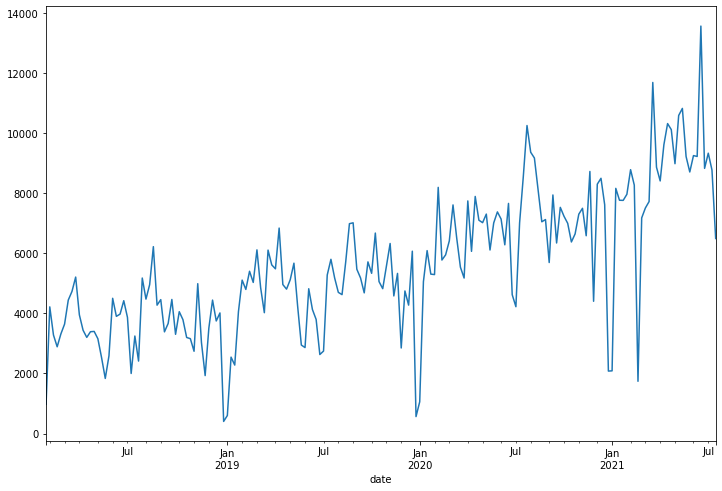

In [43]:
# plot the number of pages viewed each day over time
plt.figure(figsize=(12,8))
pages.plot()
plt.show()

## Exponential Moving Average

In [44]:
# 7 day EMA
# create a series representing an exponential moving 
# average over a 7 day span
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

date
2018-01-28     972.000000
2018-02-04    2824.000000
2018-02-11    3019.459459
2018-02-18    2970.285714
2018-02-25    3082.294494
Freq: W-SUN, Name: endpoint, dtype: float64

In [45]:
# 14 days EMA
# do the same for a 14 day span
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

date
2018-01-28     972.000000
2018-02-04    2708.250000
2018-02-11    2925.132428
2018-02-18    2912.854786
2018-02-25    3016.991162
Freq: W-SUN, Name: endpoint, dtype: float64

In [46]:
# 30 days EMA
# do the same fora  30 day span
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

date
2018-01-28     972.000000
2018-02-04    2646.516667
2018-02-11    2870.483154
2018-02-18    2874.483074
2018-02-25    2974.028768
Freq: W-SUN, Name: endpoint, dtype: float64

In [47]:
# do the same for a 90 day span
# 90 days EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

date
2018-01-28     972.000000
2018-02-04    2610.505556
2018-02-11    2837.284680
2018-02-18    2849.614050
2018-02-25    2946.246487
Freq: W-SUN, Name: endpoint, dtype: float64

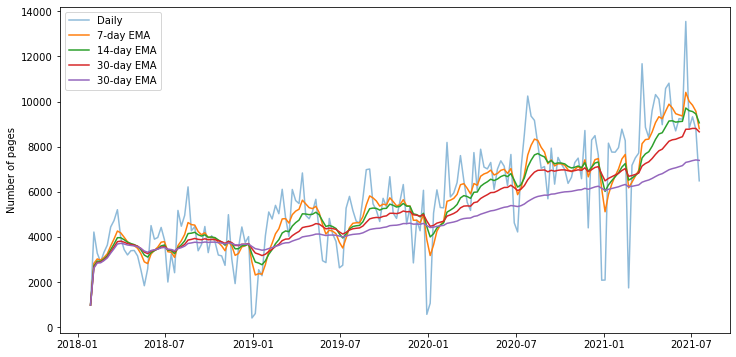

In [48]:
# combine all of these on one lineplot

# establish the fig and ax objects
fig, ax = plt.subplots(figsize=(12,6))

# plot the actual daily values
ax.plot(pages.index, pages, label='Daily', alpha=.5)
# plot the 7 day moving average
ax.plot(pages.index, ema_7d, label = '7-day EMA')
# plot the 14 day moving average
ax.plot(pages.index, ema_14d, label = '14-day EMA')
# plot the 30 day moving average
ax.plot(pages.index, ema_30d, label = '30-day EMA')
# plot the 90 day moving average
ax.plot(pages.index, ema_90d, label = '30-day EMA')
# establish a legend
ax.legend(loc='best')
# set the y axis label
ax.set_ylabel('Number of pages')
# display the plot
plt.show()

## Bollinger Bands and %b

In [49]:
# set the window span
span = 30

# compute midband
# by creating a series representing an EMA over a span of 30 days
midband = pages.ewm(span=span).mean()

midband.head()

date
2018-01-28     972.000000
2018-02-04    2646.516667
2018-02-11    2870.483154
2018-02-18    2874.483074
2018-02-25    2974.028768
Freq: W-SUN, Name: endpoint, dtype: float64

In [50]:
# compute exponential stdev
# by finding the rolling exponential weighted standard deviation over
# the same 30 day span
stdev = pages.ewm(span=span).std()

stdev.head()

date
2018-01-28            NaN
2018-02-04    2291.733078
2018-02-11    1635.518746
2018-02-18    1312.728576
2018-02-25    1136.038906
Freq: W-SUN, Name: endpoint, dtype: float64

In [51]:
# compute upper and lower bands
# by  setting the upper band as 3 standard deviations above the midband
ub = midband + stdev*3
# and the lower band as 3 standard deviations below the midband
lb = midband - stdev*3
ub

date
2018-01-28             NaN
2018-02-04     9521.715900
2018-02-11     7777.039393
2018-02-18     6812.668803
2018-02-25     6382.145485
                  ...     
2021-06-20    15865.253086
2021-06-27    15635.818155
2021-07-04    15459.092138
2021-07-11    15238.200729
2021-07-18    15116.389158
Freq: W-SUN, Name: endpoint, Length: 182, dtype: float64

In [52]:
lb

date
2018-01-28            NaN
2018-02-04   -4228.682567
2018-02-11   -2036.073084
2018-02-18   -1063.702655
2018-02-25    -434.087950
                 ...     
2021-06-20    1678.476072
2021-06-27    1914.122066
2021-07-04    2161.820116
2021-07-11    2376.846184
2021-07-18    2199.104738
Freq: W-SUN, Name: endpoint, Length: 182, dtype: float64

In [53]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)
bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-28,NaN,NaN
2018-02-04,9521.715900,-4228.682567
2018-02-11,7777.039393,-2036.073084
2018-02-18,6812.668803,-1063.702655
2018-02-25,6382.145485,-434.087950


In [54]:
# concatenate the data frame of page views together with the midband and 
# upper and lower bands
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()


,pages,midband,ub,lb
date,,,,
2018-01-28,972,972.000000,NaN,NaN
2018-02-04,4213,2646.516667,9521.715900,-4228.682567
2018-02-11,3276,2870.483154,7777.039393,-2036.073084
2018-02-18,2885,2874.483074,6812.668803,-1063.702655
2018-02-25,3312,2974.028768,6382.145485,-434.087950


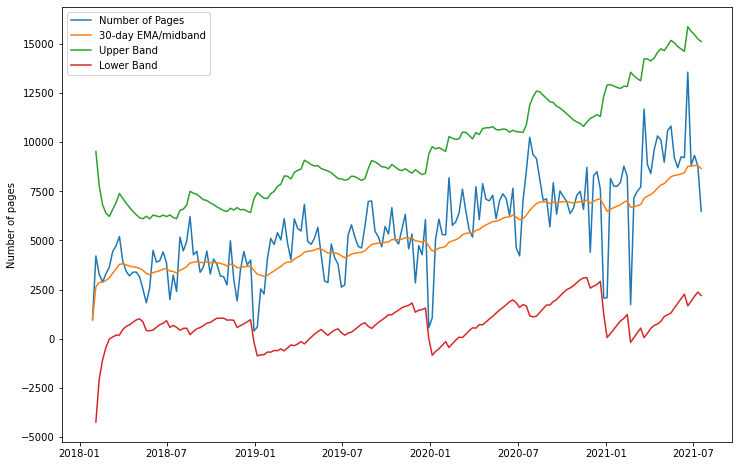

In [55]:
# plot the bands

# create the fig and ax objects and set figure size
fig, ax = plt.subplots(figsize=(12,8))

# plot the index against the number of page views
ax.plot(my_df.index, my_df.pages, label='Number of Pages')
# plot the index against the midband, then the upper and lower band
ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
# establish the legend
ax.legend(loc='best')
# establish the y axis label
ax.set_ylabel('Number of pages')
# display the plot
plt.show()

In [41]:
# get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure

919.0